In [1]:
from PulsarTimingAnalysis import *
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Image
import numpy as np

# Creating the PulsarAnalysis object and settings

In [2]:
h=PulsarAnalysis()

Setting the input file. If we use a LST1 DL2-file:

In [3]:
h.setLSTInputFile('./PulsarPhaseogram/Tutorial/example_files/dl2_sample.h5')

We need to set the phase limits of the background and the peaks (signal region). We can define one,two or three signal regions. 

In [4]:
h.setBackgroundLimits([0.52,0.87])
h.setPeaklimits(P1_limits=[0,0.026,0.983,1],P2_limits=[0.377,0.422],P3_limits=None)

We can also set the binning that we are going to use for the construction of the lightcurve:

In [5]:
h.setBinning(50,xmin=0,xmax=1)

Additional cuts in gammaness or arrival direction can be set:

- Gammaness_cut
- Alpha_cut
- Theta2_cut
- Zd_cut

In [6]:
h.setParamCuts(gammaness_cut=0.5,alpha_cut=15)

We can also define the time interval (in seconds) in which we update the statistics. For instance, if we set tint=3600, the statistics will be calculated every hour of accumulated time of observation.

In [7]:
h.setTimeInterval(tint=3600)

If we want to do the fitting to the peaks to a model we can define it as following:

Available models:

- Single gaussian ('gaussian')
- Double gausssian ('dgaussian')
- Assymetric doble gaussian ('asym_dgaussian')
- Double lorentzian ('lorentzian')

In [8]:
h.setFittingParams(model='dgaussian',binned=False)

We can also do the statistics in certain energy bins. To set this binning:

In [9]:
h.setEnergybinning(np.logspace(np.log10(0.05),np.log10(0.5), 4))

# Running

Once the settings are defined we can calculate the statistics/fitting by running:

In [10]:
h.run()

/home/alvaro.mas/miniconda3/envs/lst-dev/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "PulsarPhaseogram/models.py", line 18:
@nb.njit(**kwd)
def double_gaussian(x, mu, sigma,mu_2,sigma_2,A,B,C):
^

  state.func_ir.loc))


# Show the results

## Overall results

We can show the lightcurve with the general results of the analysis. 

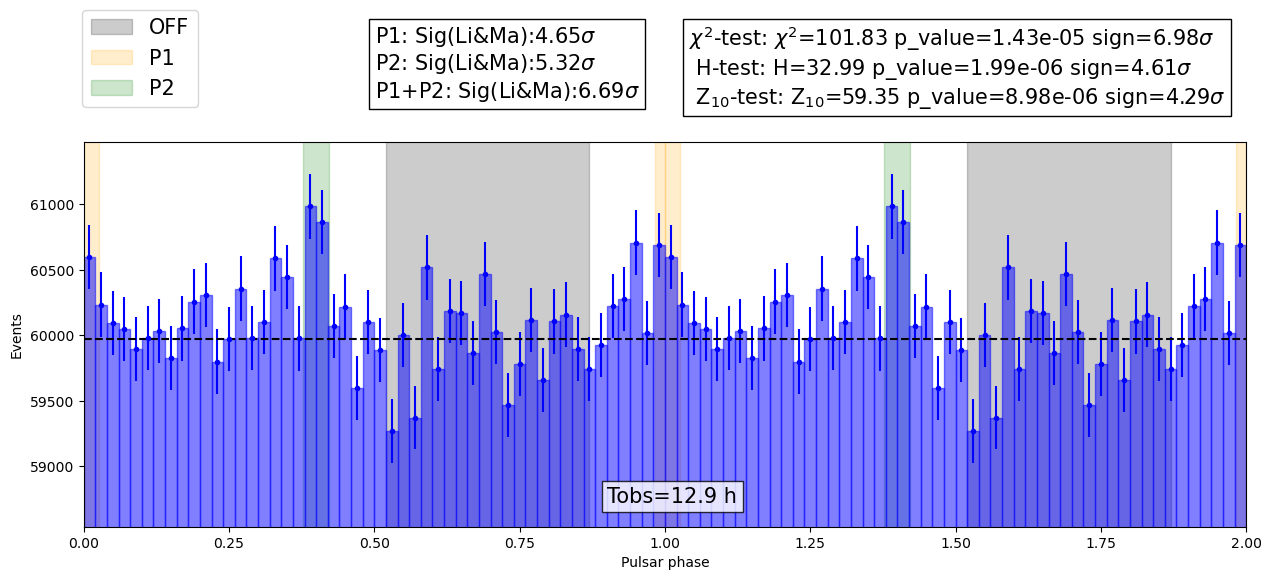

In [11]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue')

And show the overall results in detail:

In [12]:
h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                         P1             P2          P1+P2
Significance       4.653595       5.322834       6.694635
Nex             1774.454286    2082.242857    3856.697143
Nex_error        382.668262     392.736058     577.758582
Number        130607.000000  136907.000000  267514.000000
noff          128832.545714  134824.757143  263657.302857
sign_t_ratio       1.240539       1.418942       1.784632
s/n ratio          4.943699       5.670829       7.510963

P1/P2 ratio=0.85+/-0.24


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test     H_test
Statistic                101.834700  59.347145  32.987526
p-value                    0.000014   0.000009   0.000002
Number of $\sigma$         6.984613   4.288781   4.612769


## Fit results

In [13]:
h.fit_model

'dgaussian'

In [14]:
h.show_fit_results()

      Name     Value      Error
0       mu  1.000425   0.003602
1    sigma  0.010857   0.003939
2     mu_2  0.397994   0.003032
3  sigma_2  0.011158   0.002659
4        A  1.259343  16.438905
5        B  0.000620   0.008111
6        C  0.000817   0.010678


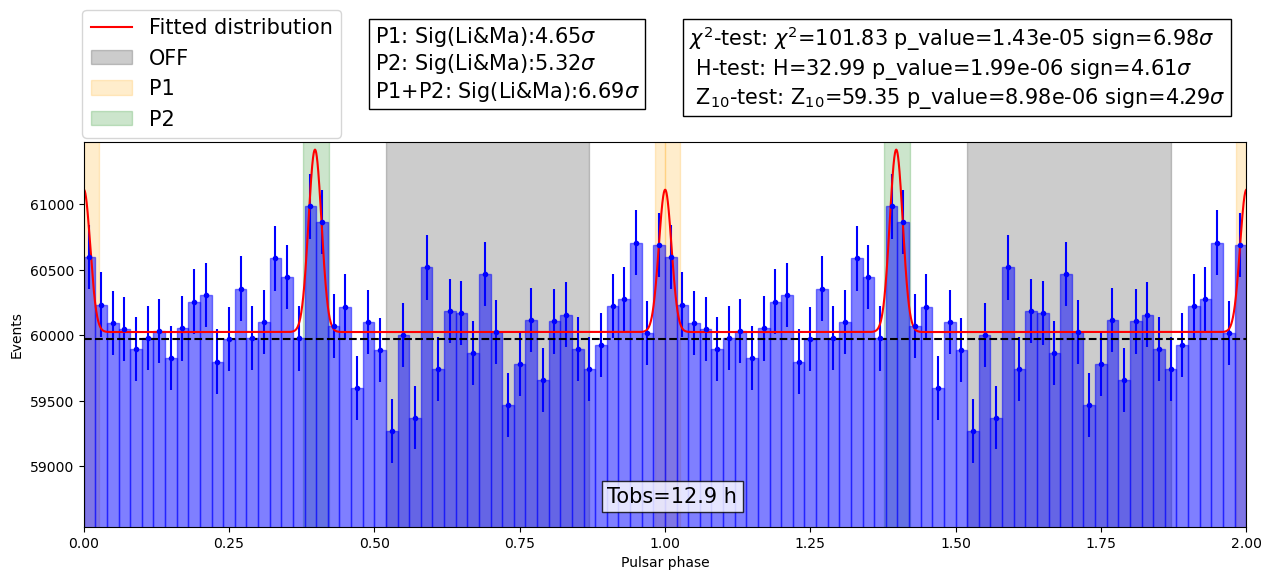

In [15]:
h.draw_phaseogram(phase_limits=[0,2],colorhist='blue',fit=True)

## Results vs Time

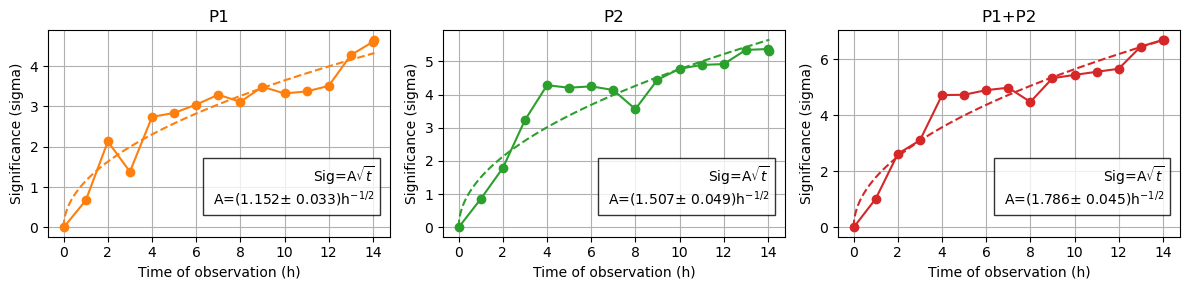

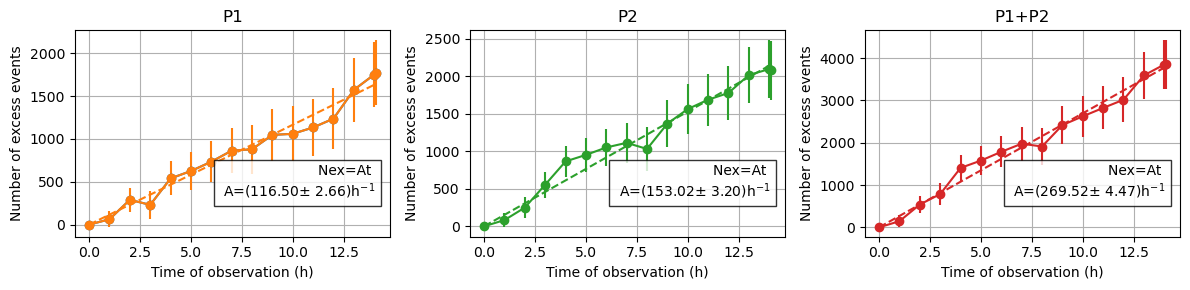

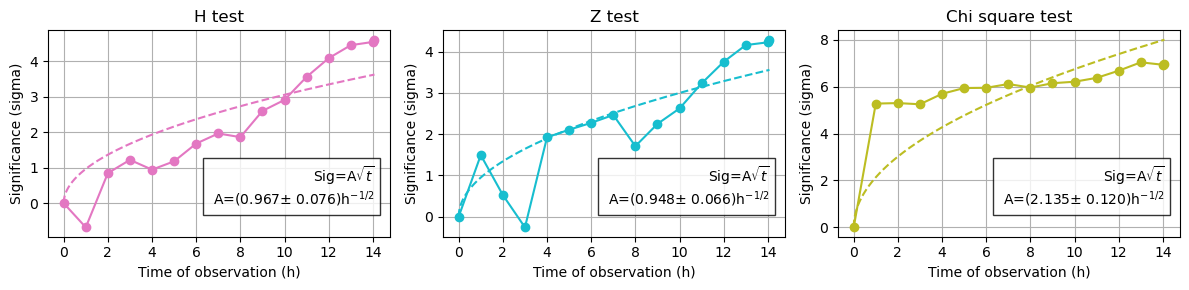

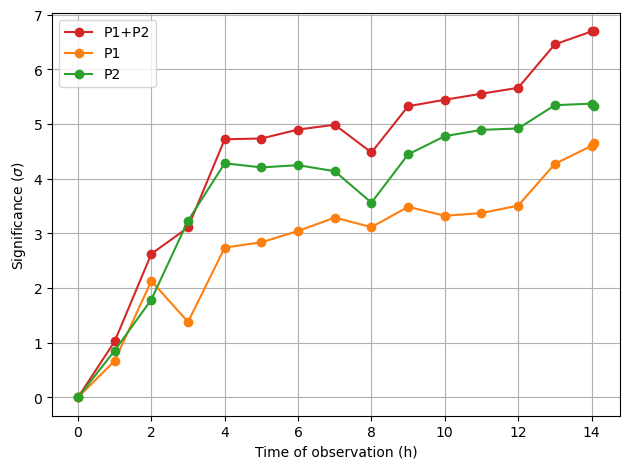

In [16]:
h.show_timeEvolution()

## Results vs Energy

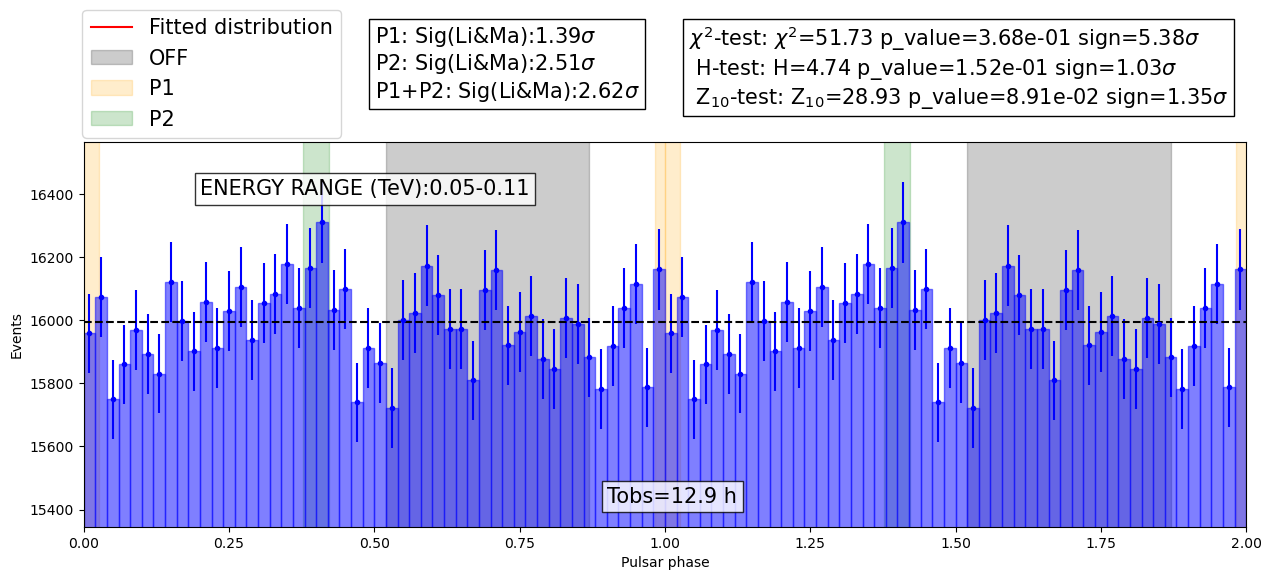

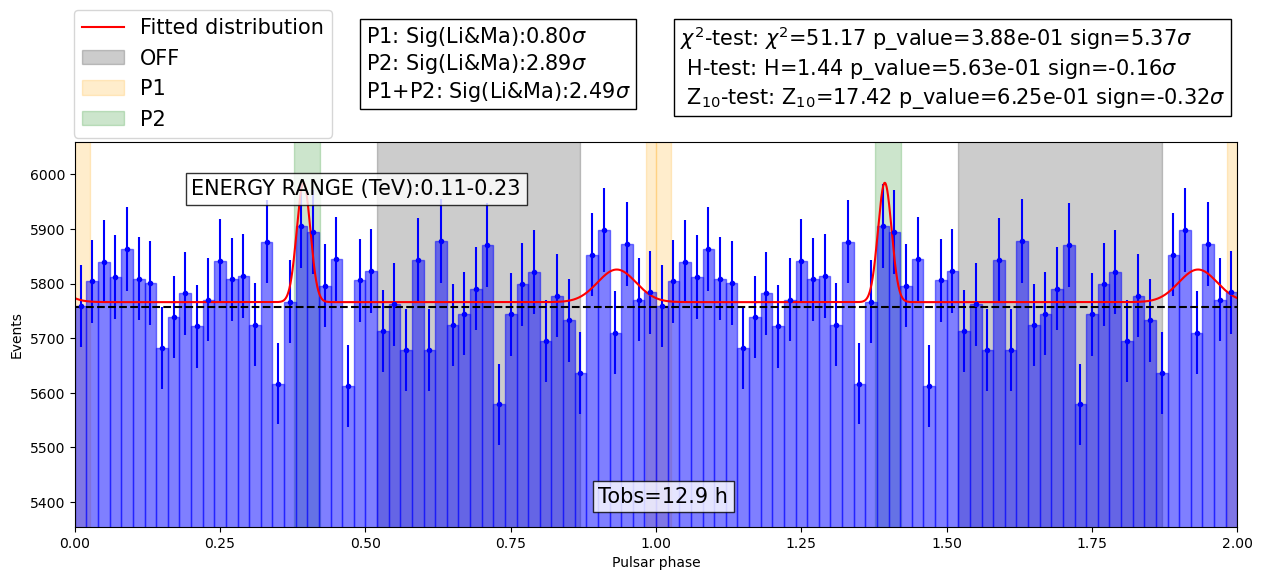

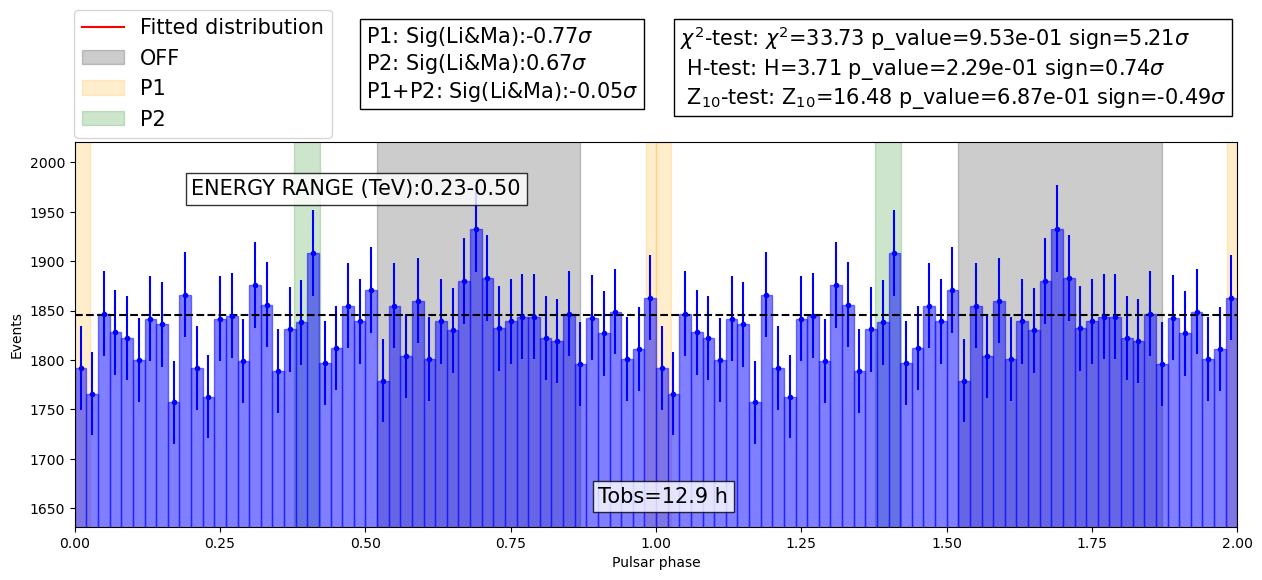

In [17]:
h.show_lcVsEnergy()

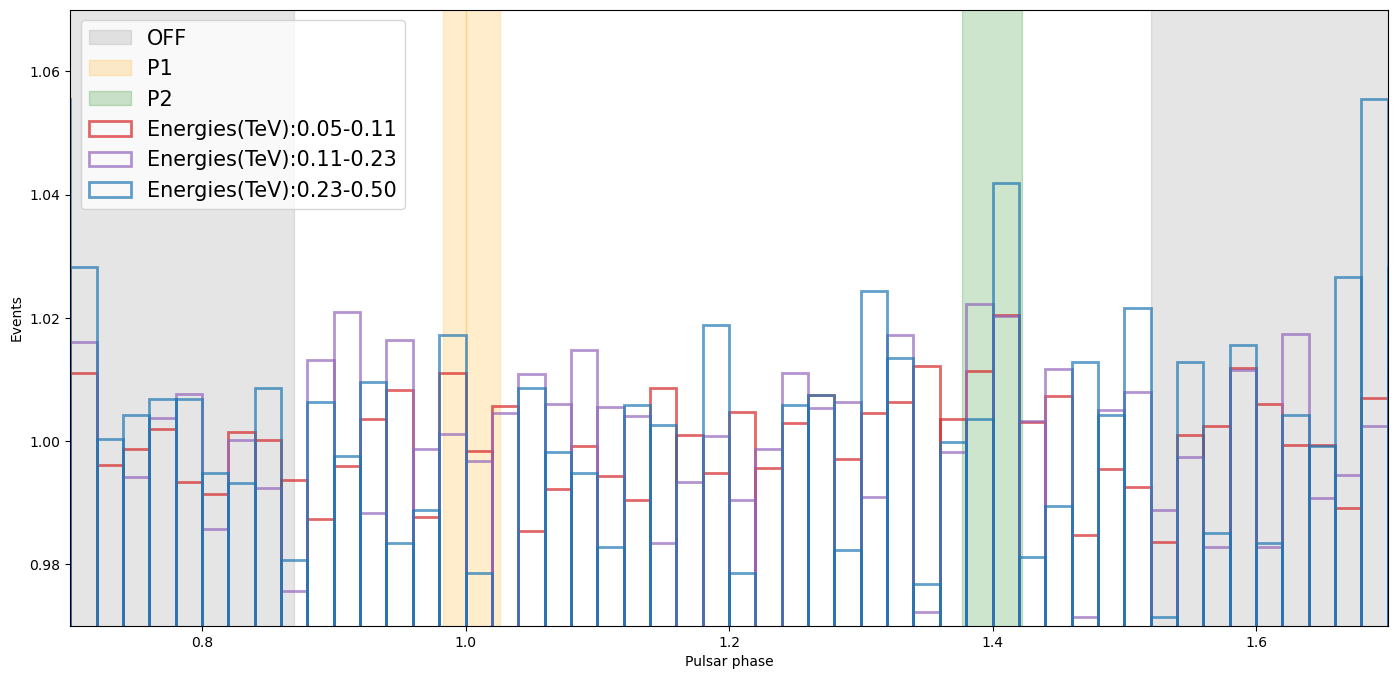

In [18]:
h.show_all_lc(ylimits=[0.97,1.07])

In [19]:
h.show_EnergyPresults()

ENERGY RANGE (TeV):0.05-0.11

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2         P1+P2
Significance      1.392030      2.507873      2.624771
Nex             273.760000    506.400000    780.160000
Nex_error       197.069308    202.652250    297.884819
Number        34617.000000  36447.000000  71064.000000
noff          34343.240000  35940.600000  70283.840000
sign_t_ratio      0.371085      0.668544      0.699706
s/n ratio         1.477234      2.671167      2.942767

P1/P2 ratio=0.54+/-0.45


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test    H_test
Statistic                 51.732822  28.932779  4.741093
p-value                    0.367611   0.089091  0.151532
Number of $\sigma$         5.382344   1.346371  1.029883

 

-------------------------------------------------------------------
ENERGY RANGE (TeV):0.11-0.23

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2         P1+P2
Significanc

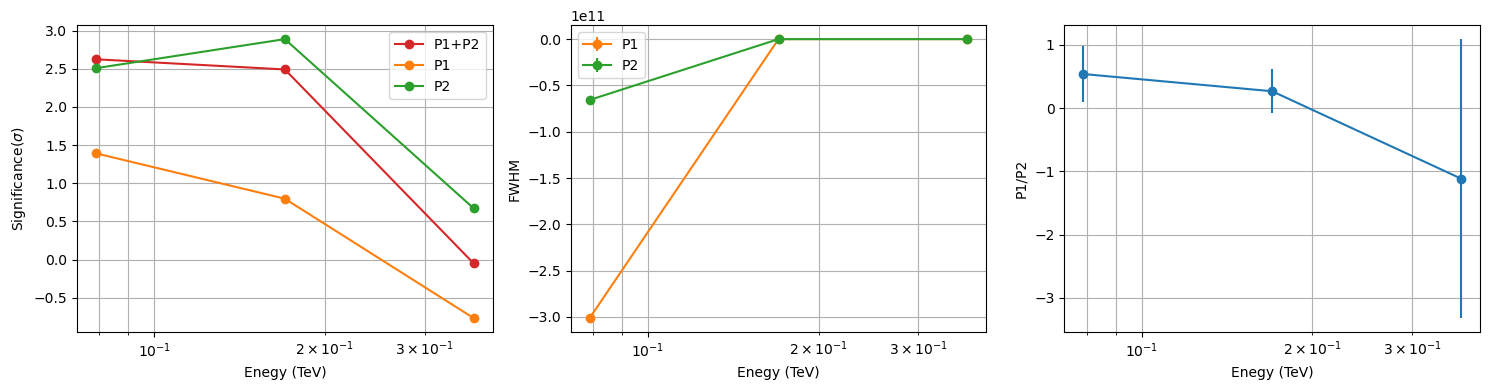

In [20]:
h.show_EnergyAna()

## Fit vs Energy

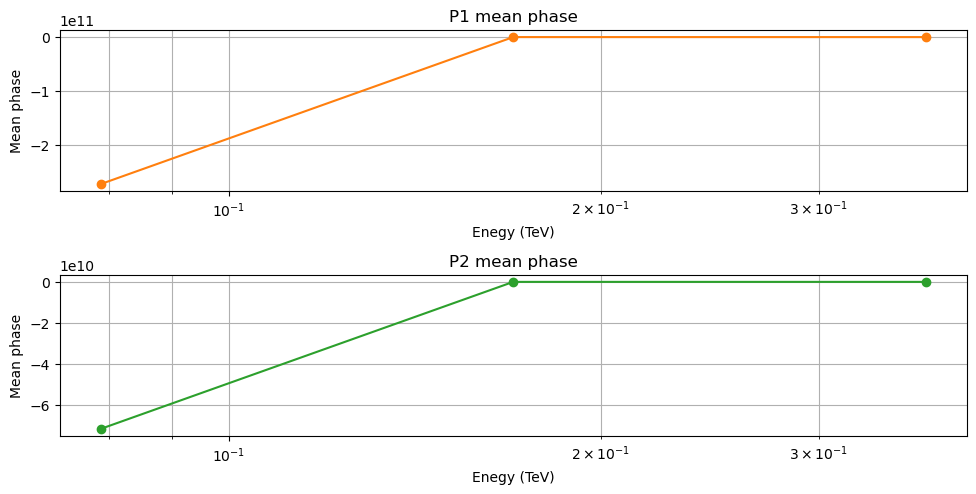

In [21]:
h.show_meanVsEnergy()

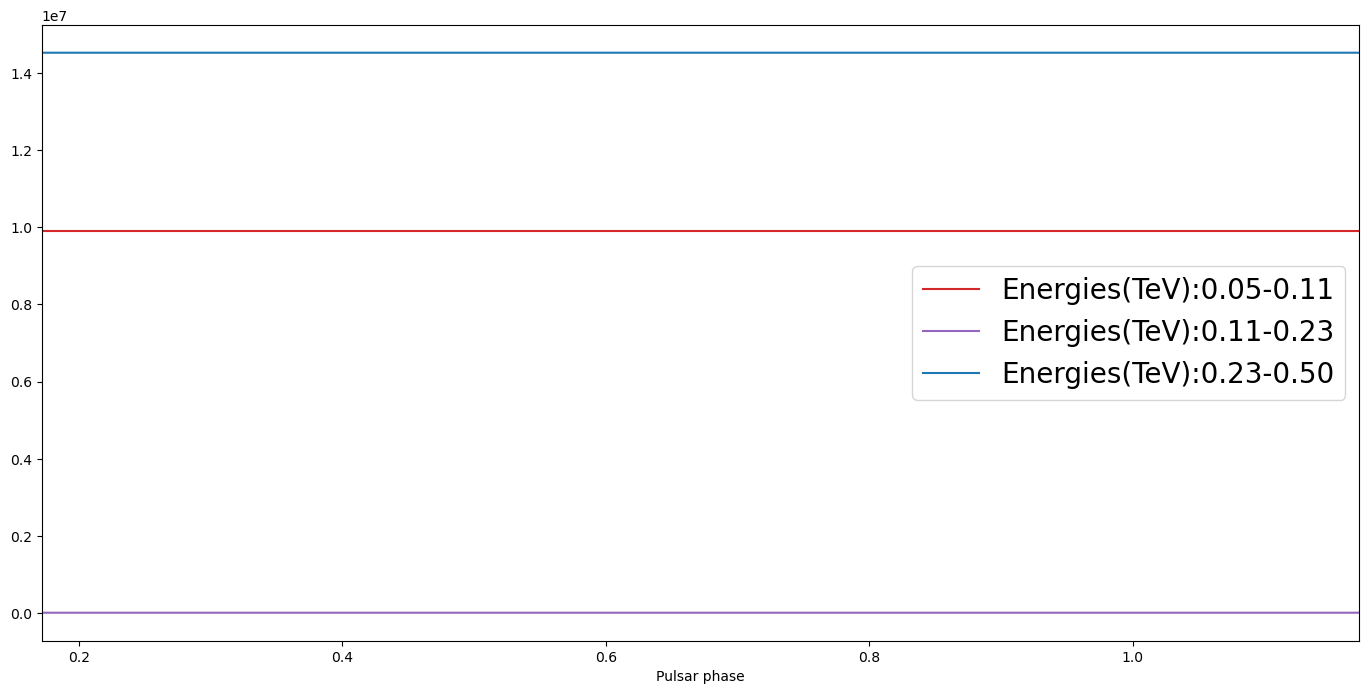

In [22]:
h.show_all_fits()